In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

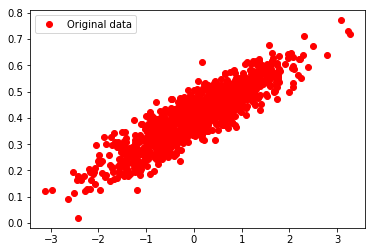

0 [0.24424362] [0.50725865] 0.035191394


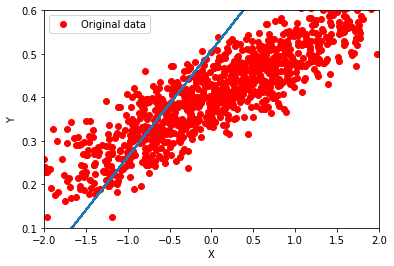

1 [0.06974134] [0.37440094] 0.004167187


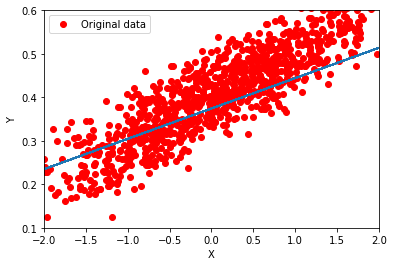

2 [0.10687494] [0.4074684] 0.0025772667


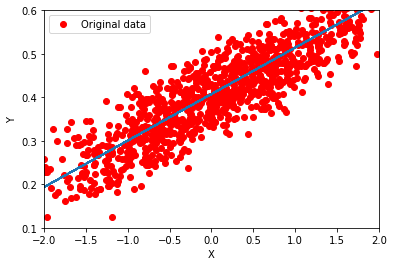

3 [0.09879449] [0.39947262] 0.0024942781


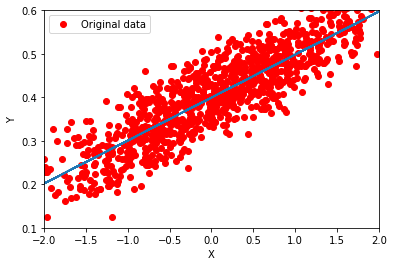

4 [0.10058261] [0.40137258] 0.0024899093


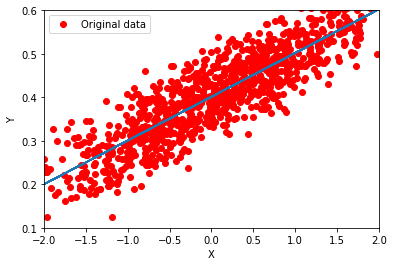

5 [0.10018206] [0.40092602] 0.0024896788


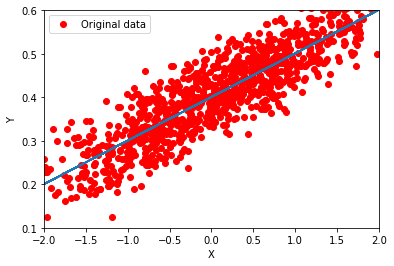

6 [0.10027257] [0.40103024] 0.0024896662


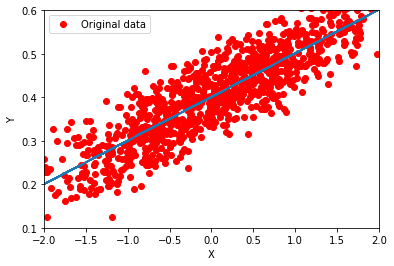

7 [0.100252] [0.401006] 0.0024896655


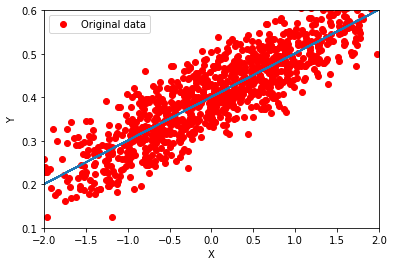

8 [0.10025669] [0.40101165] 0.0024896658


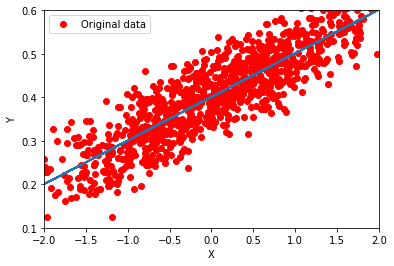

9 [0.10025562] [0.40101033] 0.002489666


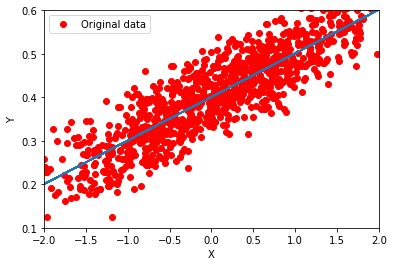

10 [0.10025586] [0.40101063] 0.002489666


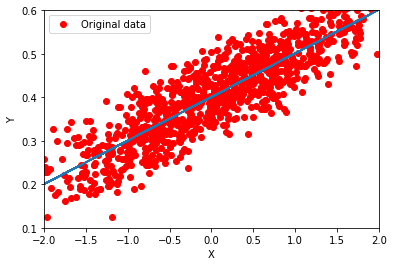

11 [0.10025581] [0.40101057] 0.002489666


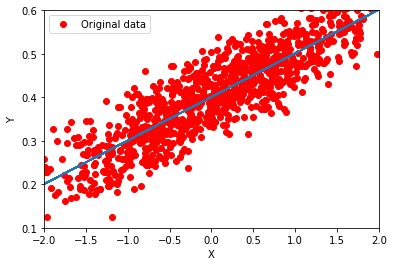

12 [0.10025582] [0.40101057] 0.002489666


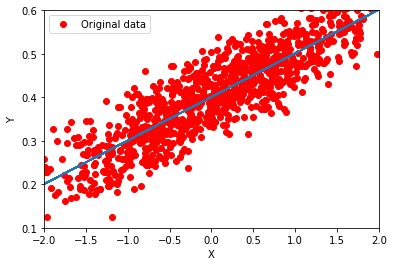

13 [0.10025582] [0.40101057] 0.002489666


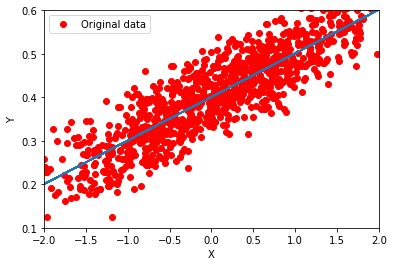

14 [0.10025582] [0.40101057] 0.002489666


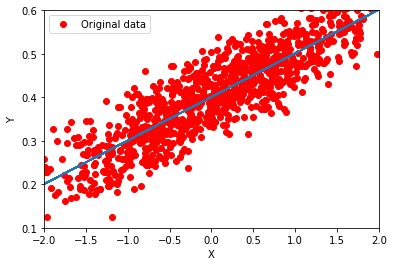

15 [0.10025582] [0.40101057] 0.002489666


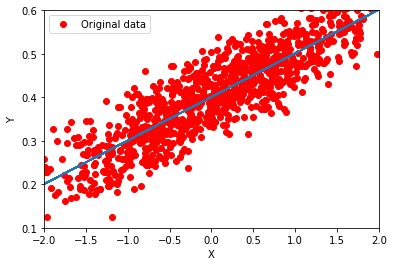

In [5]:
num_points = 1000
vectors_set = []

for i in range(num_points):
    W = 0.1
    b = 0.4
    x1 = np.random.normal(0.0, 1.0)
    nd = np.random.normal(0.0, 0.05)
    y1 = W * x1 + b
    y1 = y1 + nd
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

with tf.name_scope('LinearRegression') as scope:
    W = tf.Variable(tf.random_uniform([1], -1.0,  1.0), name='Weights')
    b = tf.Variable(tf.zeros([1]))
    y = W * x_data + b

with tf.name_scope('LossFunction') as scope:
    loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.6)
train = optimizer.minimize(loss)

loss_summary = tf.summary.scalar('loss', loss)
w_ = tf.summary.histogram('W', W)
b_ = tf.summary.histogram('b', b)

merged_op = tf.summary.merge_all()

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

writer_tensorboard = tf.summary.FileWriter('/home/sha/tmp/tensorboard/', sess.graph_def)

for i in range(16):
    sess.run(train)
    print(i, sess.run(W), sess.run(b), sess.run(loss))
    plt.plot(x_data, y_data, 'ro', label='Original data')
    plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
    plt.xlabel('X')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('Y')
    plt.legend()
    plt.show()

sess.close()